# Breast Cancer Detection

In this notebook, I explore logistic regression using a breast cancer diagnosis data set downloaded from Kaggle.

Link to data:

This project will look at how linear regression and logistic regression differ, and how logistic regression can be a powerful tool for classification.

Since the diagnosis has two possible outputs (benign or malignant), I will be exploring binary logistic regression. 

## Linear Regression

The basic model of a multivariate linear regression is:

$\hat{y_{i}} = \alpha + \beta_{1}x_{i,1} + \beta_{2}x_{i,2} + \beta_{3}x_{i,3} + ... + \beta_{k}x_{i,k} + \mu_{i}$

Where the inputs for a single observation, $i$, are $x_{i,1}, x_{i,2}, x_{i,3}, ..., x_{i,k}$ , and are weighted by the coeffiecients $\beta_{1}, \beta_{2}, \beta_{3}, ..., \beta_{k}$, and $\mu_{i}$ is the error term to give output $y_{i}$. 

TO DO: write in matrix notation

We can calculate $\textbf{b}$ by solving the minimization function, where we try to minimize the sum of squared residuals: $min(\sum(y_{i}-\hat{y_{i}}))$ where

$\textbf{b} = \begin{bmatrix} \beta_{1} \\ \beta_{2} \\ \beta_{3} \\ : \\ \beta{k} \end{bmatrix}$

$\textbf{X} = \begin{bmatrix} x_{1, 1} && x_{1,2} && x_{1,3} && ... && x_{1,k} \\ x_{2,1} && x_{2,2} && x_{2,3} && ... && x_{2,k}\\ x_{2,1} && x_{2,2} && x_{3,3} && ... && x_{3,k} \\ : \\ x_{i,1} && x_{i,2} && x_{i,3} && ... && x_{i,k}
\end{bmatrix}$

$\textbf{y} = \begin{bmatrix} y_{1} \\ y_{2} \\ y_{3} \\ : \\ y_{k} \end{bmatrix}$


$\textbf{e} = \begin{bmatrix} \mu_{1} \\ \mu_{2} \\ \mu_{3} \\ : \\ \mu_{k} \end{bmatrix}$

Using the matrix notation we can rewrite the regression equation as $$\textbf{y} = \textbf{Xb} + \textbf{e}$$ Solving for $\textbf{b}$ we get $$\textbf{b} = (\textbf{X}'\textbf{X})^{-1}\textbf{X}'\textbf{y}$$

TODO: Provide a proof

### In Practice

In [170]:
import pandas as pd

data = pd.read_csv("Data/data.csv")

Before we solve for $\textbf{b}$, lets store the $\textbf{y}$ vector separately and split the data into training and testing datasets

In [171]:
# Creating y_train and y_test matrix

y = data['diagnosis'].to_numpy()
y = [1 if i == 'M' else 0 for i in y]

y_train = y[0:500]
y_test = y[500:568]

# Creating X_train and X_test matrix

X = data.loc[: , data.columns!='diagnosis']
X = X.loc[: , X.columns!='Unnamed: 32']
X['intercept'] = 1

X_train = X[0:500]
X_train = X_train.to_numpy()

X_test = X[500:568]
X_test = X_test.to_numpy()

# Printing dimensions

print(len(list(y)))
print(len(X_train[0]))

569
32


Looking at the number of rows and columns, we can say $k$ = 32 and $i$ = 569. So our final $\textbf{b}$ vector should be of length 32. The extra column of 1's is to have an intercept parameter $\alpha$ at the end of the calculation.

Let's solve for the $\textbf{b}$ vector using the NumPy package

In [172]:
import numpy as np

X_prime = np.transpose(X_train)

b = np.dot(np.linalg.inv(np.dot(X_prime,X_train)),np.dot(X_prime,y_train))

In [173]:
print(b)

[-8.41005914e-11 -2.16877650e-01  1.25440401e-02  2.22374266e-02
  4.34421205e-04  1.42003048e+00 -4.72654036e+00  1.75882957e+00
  9.95785525e-01 -5.48863578e-02  2.25387011e+00  4.03928224e-01
  1.57951532e-03 -3.55357471e-02 -2.40271249e-04  1.63048117e+01
 -8.95696092e-01 -4.21536966e+00  1.63083473e+01  6.45381208e-01
 -4.13925728e+00  1.94784782e-01  1.98385282e-03  6.95544090e-04
 -1.14730969e-03  3.33884634e-01  2.81861375e-01  3.42592162e-01
  2.05785942e-01  7.28211463e-01  3.66795653e+00 -2.34327087e+00]


In [174]:
y_pred = np.dot(X_test, b)
print(y_pred)

[ 0.17750409  0.7842319   0.16390178  1.23518185 -0.08932983  0.00315432
  0.09088674  0.18277033  0.38708987  0.80940707  0.04999395  0.13549723
  0.75978182  0.25438177  0.3592232   0.08640134  0.85346089  0.94047907
  0.11633467  0.16514368  0.11374871  1.1268561  -0.12143329  0.32246549
 -0.06021046 -0.1611303   0.26679583  0.0356371   0.39233451  0.04632439
  0.21059332  0.15423983  0.14188723  0.82610262 -0.078297    0.9074184
  0.41830642  0.32704554 -0.02996056 -0.20568221 -0.1130237   0.54429582
  0.41777188  0.2267564   0.08704817  0.25564593 -0.14510353 -0.03250305
 -0.04970944  0.21208922 -0.13852596 -0.00896615  0.32772947 -0.11129457
  0.26056304  0.14553683 -0.18601073 -0.05348522  0.09123026  0.15914164
  0.35340521 -0.10975948  1.26661198  1.19400826  1.33871872  0.99210586
  0.60546671  1.63565221]


In [175]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)
b_sk = reg.coef_

In [176]:
print(b_sk)

[-8.41005854e-11 -2.16877652e-01  1.25440415e-02  2.22374250e-02
  4.34421290e-04  1.42003049e+00 -4.72654020e+00  1.75882946e+00
  9.95785611e-01 -5.48864613e-02  2.25387018e+00  4.03928053e-01
  1.57953334e-03 -3.55357258e-02 -2.40271053e-04  1.63048115e+01
 -8.95696346e-01 -4.21537010e+00  1.63083470e+01  6.45381191e-01
 -4.13925733e+00  1.94784811e-01  1.98385059e-03  6.95540705e-04
 -1.14730973e-03  3.33884292e-01  2.81861555e-01  3.42592202e-01
  2.05785905e-01  7.28211298e-01  3.66795659e+00  0.00000000e+00]


In [177]:
y_pred_sk = reg.predict(X_test)
print(y_pred_sk)

[ 0.17750411  0.78423188  0.16390176  1.23518186 -0.08932982  0.00315433
  0.09088673  0.18277033  0.38708986  0.80940707  0.04999397  0.13549722
  0.75978181  0.25438176  0.35922321  0.08640132  0.85346087  0.94047908
  0.1163347   0.16514367  0.11374869  1.1268561  -0.12143329  0.32246549
 -0.06021044 -0.1611303   0.26679583  0.0356371   0.39233452  0.04632439
  0.21059333  0.15423983  0.14188723  0.8261026  -0.078297    0.9074184
  0.41830641  0.32704555 -0.02996056 -0.20568223 -0.1130237   0.54429583
  0.41777188  0.2267564   0.08704818  0.25564593 -0.14510354 -0.03250305
 -0.04970944  0.21208923 -0.13852595 -0.00896616  0.32772946 -0.11129457
  0.26056303  0.14553683 -0.1860107  -0.0534852   0.09123027  0.15914166
  0.35340523 -0.10975942  1.266612    1.19400823  1.3387187   0.99210586
  0.60546672  1.63565223]


We will mark all values below 0.5 as 0, otherwise it will be a 1

In [178]:
y_pred = [0 if i <.5 else 1 for i in y_pred]
print(y_pred)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [179]:
# actual values
print(y_test)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [180]:
np.subtract(y_test,y_pred)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

### Out of the 68 patients in the testing dataset, the model misdiagnoses 3 total patients: 2 false negatives and 1 false positive

## Logistic Regression

Logistic Regression is based on the sigmoid function ($\sigma$):

$\sigma(x) = \frac{1}{1+e^{-x}}$

X values from -10 to 10 of the sigmoid function are graphed below.

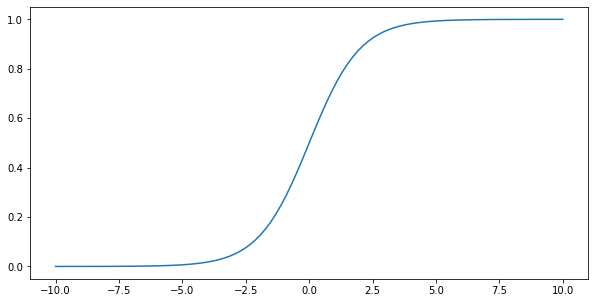

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    return float(1/(1+math.exp(-x)))

def sigmoid_list(x):
    a = []
    for num in x:
        a.append(1/(1+math.exp(-num)))
    return a

x = np.linspace(-10, 10, 100)
sigma_x = sigmoid_list(x)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, sigma_x)
 
# Show the plot
plt.show()

As noted from the graph, the sigmoid function has a large range of values that are either close to 0 or close to 1. This makes the sigmoid function a very powerful tool for classifiction

### Loss Function

We need a loss function to measure how well the model is performing. We are going to use the negative log-likelihood loss function: 

log $\mathbb{P}(\beta\mid{x_{i}y_{i}}) = -(y_i$ log$(\sigma(\beta x_{i}))+(1-y_{i})$ log$(1 - \sigma(\beta x_{i})))$

In [182]:
def neg_log_likelihood(y, y_pred):
    return float(-((y * math.log(y_pred)) + ((1 - y) * math.log(1 - y_pred))))

Now we make a function that can apply to the entire data set

In [183]:
def error(ys, ys_pred):
    sum_loss = 0
    num_obs = len(ys)
    for i in range(num_obs):
        sum_loss += neg_log_likelihood(ys[i],ys_pred[i])
    return float(sum_loss/num_obs)

In [184]:
import scipy
import random

new_X = pd.DataFrame()

print(np.shape(X))

for column in X:
    if column != 'intercept':
        col = list(X[column])
        new_col = scipy.stats.zscore(col)
        new_X[column] = new_col
    
print(np.shape(new_X))

(569, 32)
(569, 31)


In [185]:
new_X['intercept'] = 1

X_train = new_X[0:500]
X_train = X_train.to_numpy()

X_test = new_X[500:568]
X_test = X_test.to_numpy()

In [186]:
print(X_train)
num_obs = np.shape(X_train)[0]

[[-0.23640517  1.09706398 -2.07333501 ...  2.75062224  1.93701461
   1.        ]
 [-0.23640344  1.82982061 -0.35363241 ... -0.24388967  0.28118999
   1.        ]
 [ 0.43174109  1.57988811  0.45618695 ...  1.152255    0.20139121
   1.        ]
 ...
 [-0.23582653 -0.47069438 -0.4606775  ...  0.21717781 -0.40652031
   1.        ]
 [-0.23582502  1.23907108 -0.41180909 ... -0.63215701  0.58209788
   1.        ]
 [-0.242416    1.83550089  0.45385988 ... -0.68069043  0.33494333
   1.        ]]


In [187]:
beta = [random.random() / 10 for _ in range(32)]
print(beta)

[0.018439992689438113, 0.01648936421312732, 0.022394387462196307, 0.004726458131288658, 0.09547278153820746, 0.04868372009288533, 0.06389672873085307, 0.09855183308121983, 0.047801978996323005, 0.04397244324183793, 0.06406552747156719, 0.016617603985256267, 0.060433066627713826, 0.010835311650203383, 0.08635020703282831, 0.03162030789545659, 0.027678881908095677, 0.03567540335222278, 0.07621832343375802, 0.06890678595232276, 0.09530387220560221, 0.008431339640500435, 0.09047202568217234, 0.0818102197796765, 0.04485707751177107, 0.08254012098867783, 0.025225138235565436, 0.014080292698708174, 0.051442081830807916, 0.0959105037336581, 0.0865065276752924, 0.0675214067207974]


In [188]:
epochs: int = 3200
learning_rate: float = 0.01

for epoch in range(epochs):
    # Calculate the "predictions" based on our current `beta` vector
    dot_p = [np.dot(beta, x) for x in X_train]
    y_pred = sigmoid_list(dot_p)

    # Calculate and print the error
    if epoch % 1000 == True:
        loss: float = error(y_train, y_pred)
        print(f'Epoch {epoch} --> loss: {loss}')

    # Calculate the gradient
    grad = [0 for _ in range(len(beta))]
    for x, y in zip(X_train, y_train):
        dot_p_i = np.dot(beta, x)
        y_pred_i = sigmoid(dot_p_i)
        err = y_pred_i - y
        for i, x_i in enumerate(x):
            grad[i] += (err * x_i)
    grad = [1 / num_obs * g_i for g_i in grad]

    # Take a small step in the direction of greatest decrease
    beta = [b + (gb * -learning_rate) for b, gb in zip(beta, grad)]

print(f'Best estimate for "beta": {beta}')

Epoch 1 --> loss: 0.45870843996161564
Epoch 1001 --> loss: 0.10100012326240429
Epoch 2001 --> loss: 0.08323360375927852
Epoch 3001 --> loss: 0.07559658078050249
Best estimate for "beta": [0.008705764212771404, 0.4878249140673788, 0.5813522097767367, 0.46319266071426446, 0.5675050039496174, 0.21394452811567816, 0.08677184500545225, 0.3988567939427921, 0.4953898972234554, 0.07964891057545986, -0.23324774150432714, 0.5067031292308778, -0.023181703316456706, 0.40130427200686764, 0.5125030403396078, 0.055860143082395806, -0.28465862283707843, -0.1643615602299974, 0.13743068777441048, -0.13846760068840688, -0.2641057283815161, 0.6099877334397433, 0.707973702980055, 0.6441796459394682, 0.6113007336002679, 0.5499095136326488, 0.1854792896803913, 0.3419545702408963, 0.5734463617178986, 0.46617013062049906, 0.18573560294225147, -0.3184890480782338]


In [189]:
dot_p_test = [np.dot(beta, x) for x in X_test]
y_pred_test = sigmoid_list(dot_p_test)
y_pred_test = [1 if num>=0.5 else 0 for num in y_pred_test]
print(y_pred_test)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [190]:
print(y_test)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [191]:
diff = np.subtract(y_test,y_pred_test)

In [192]:
accuracy = list(diff).count(0)/len(diff)
print(accuracy)

0.9705882352941176
